# MSDS 458 Final Project  
For the final project I've chosen to build a 3D CNN to detect/predict whether or not a brain CT Scan has an intra-cranial hemorrhage or not.  
## Imports

In [2]:
import os

from keras.models import Sequential
from keras import layers
from keras import optimizers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


## Load the Pre-Processed Arrays

In [6]:
FILE_PATH = "/Users/jasonadam/Downloads/cv_medical/processed_arrays/"
TRAINING_FILES = os.listdir(FILE_PATH)
FILES = [os.path.join(FILE_PATH, f) for f in TRAINING_FILES]

In [7]:
array_data = [np.load(f) for f in FILES]
array_data = np.array(array_data)
array_data.shape

(120, 8, 128, 128)

In [24]:
training_array = np.zeros((120, 8, 128, 128, 1))

for i in range(120):
    training_array[i, :, :, :, 0] = array_data[i, :, :, :]
    
training_array.shape

(120, 8, 128, 128, 1)

In [10]:
labels_df = pd.read_csv("/Users/jasonadam/Downloads/cv_medical/ich_reads.csv")
labels_df.head()

,patient_id,ich_flag
0,CQ500-CT-427,1
1,CQ500-CT-181,1
2,CQ500-CT-99,0
3,CQ500-CT-47,0
4,CQ500-CT-195,0


In [10]:
file_ids = [n.split(".")[0] for n in TRAINING_FILES]
file_ids = pd.DataFrame(file_ids, columns=["file_id"])
file_labels = file_ids.merge(labels_df, how="left",left_on="file_id", right_on="patient_id")
file_labels.reset_index(inplace=True)
file_labels.drop(columns=["index", "file_id"], inplace=True)

training_labels = file_labels["ich_flag"]
training_labels.shape

(120,)

In [11]:
file_labels.groupby(["ich_flag"]).count()

,patient_id
ich_flag,
0,37
1,83


## Model 1

In [12]:
def model1():
    model = Sequential()
    model.add(
        layers.Conv3D(
            filters=32,
            kernel_size=5, 
            input_shape=(8, 128, 128, 1), 
            activation="relu"
        )
    )
    model.add(layers.MaxPooling3D())
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    
    model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    return model

In [13]:
model1 = model1()
model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 4, 124, 124, 32)   4032      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 2, 62, 62, 32)     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               125960704 
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 126,096,321
Trainable params: 126,096,321
Non-trainable 

In [14]:
hist1 = model1.fit(training_array, training_labels, epochs=5, batch_size=10, verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 40s - loss: 2.7137 - acc: 0.6250
Epoch 2/5
 - 38s - loss: 2.7499 - acc: 0.6917
Epoch 3/5
 - 37s - loss: 2.7466 - acc: 0.6917
Epoch 4/5
 - 37s - loss: 2.7364 - acc: 0.6917
Epoch 5/5
 - 38s - loss: 2.7364 - acc: 0.6917


In [15]:
hist1.history

{'loss': [2.7137377485632896,
  2.749868094921112,
  2.7465988670786223,
  2.73642772808671,
  2.7364357685049376],
 'acc': [0.6250000111758709,
  0.6916666602094969,
  0.6916666726271311,
  0.6916666701436043,
  0.6916666676600774]}

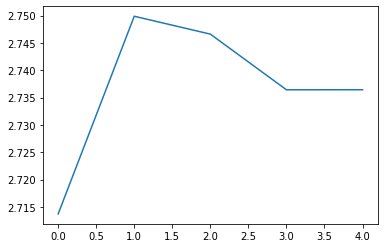

In [17]:
plt.plot(hist1.history.get("loss"))

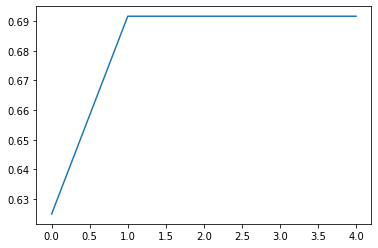

In [18]:
plt.plot(hist1.history.get("acc"))

## Model 2

In [3]:
FILE_PATH_TWO = "/Users/jasonadam/Downloads/cv_medical/processed_arrays_two/"
TRAINING_FILES_TWO = os.listdir(FILE_PATH_TWO)
FILES_TWO = [os.path.join(FILE_PATH_TWO, f) for f in TRAINING_FILES_TWO]

In [4]:
array_data_two = [np.load(f) for f in FILES_TWO]
array_data_two = np.array(array_data_two)
array_data_two.shape

(120, 32, 256, 256)

In [5]:
training_array_two = np.zeros((120, 32, 256, 256, 1))

for i in range(120):
    training_array_two[i, :, :, :, 0] = array_data_two[i, :, :, :]
    
training_array_two.shape

(120, 32, 256, 256, 1)

In [11]:
file_ids = [n.split(".")[0] for n in TRAINING_FILES_TWO]
file_ids = pd.DataFrame(file_ids, columns=["file_id"])
file_labels = file_ids.merge(labels_df, how="left",left_on="file_id", right_on="patient_id")
file_labels.reset_index(inplace=True)
file_labels.drop(columns=["index", "file_id"], inplace=True)

training_labels = file_labels["ich_flag"]
training_labels.shape

(120,)

In [13]:
def model2():
    model = Sequential()
    model.add(
        layers.Conv3D(
            filters=32,
            kernel_size=3, 
            input_shape=(32, 256, 256, 1), 
            activation="relu"
        )
    )
    model.add(layers.MaxPooling3D())
    model.add(layers.Conv3D(filters=64, kernel_size=3, activation="relu"))
    model.add(layers.MaxPooling3D())
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    
    model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    return model

In [14]:
model2 = model2()

In [15]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 30, 254, 254, 32)  896       
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 15, 127, 127, 32)  0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 13, 125, 125, 64)  55360     
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 6, 62, 62, 64)     0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1476096)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               755761664 
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
__________

In [16]:
hist2 = model2.fit(training_array_two, training_labels, epochs=5, batch_size=10, verbose=1, shuffle=True)

Epoch 1/5
120/120 [==============================] - 1382s 12s/step - loss: 4.5736 - acc: 0.6917
Epoch 2/5
120/120 [==============================] - 1304s 11s/step - loss: 4.9156 - acc: 0.6917
Epoch 3/5
120/120 [==============================] - 30078s 251s/step - loss: 4.9156 - acc: 0.6917
Epoch 4/5
120/120 [==============================] - 32731s 273s/step - loss: 4.9156 - acc: 0.6917
Epoch 5/5
120/120 [==============================] - 13109s 109s/step - loss: 4.9156 - acc: 0.6917


In [19]:
hist2.history

{'loss': [4.573568686842922,
  4.915568798780445,
  4.915568868319194,
  4.9155688881874084,
  4.9155687888463335],
 'acc': [0.6916666726271311,
  0.6916666726271311,
  0.6916666726271311,
  0.6916666676600774,
  0.6916666689018408]}